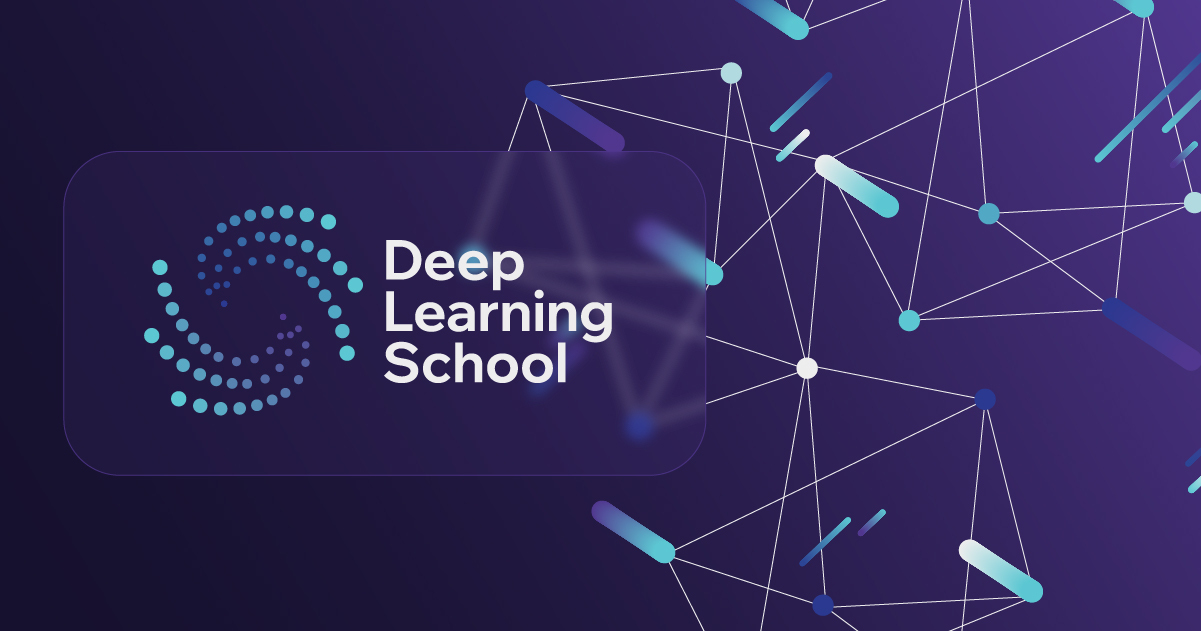

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

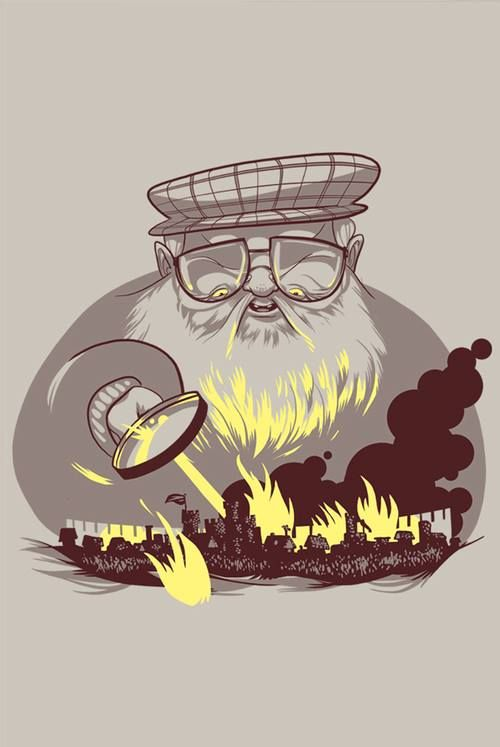

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [275]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 79.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [218]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [219]:
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [220]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [221]:
test_data.isna().sum()

,0
name,0
title,168
male,0
culture,200
dateOfBirth,235
mother,386
father,385
heir,387
house,46
spouse,313


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [222]:
data['isPopular'] = 0
data.loc[(data['popularity'] > 0.5), 'isPopular'] = 1

data['boolDeadRelations'] = 0
data.loc[(data['numDeadRelations'] > 0), 'boolDeadRelations'] = 1

cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["Asshai'i", 'Asshai'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Andal': ['Andal', 'Andals'],
    'Braavosi': ['Braavosi', 'Braavos'],
    'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
    'Myrish': ['Myr', 'Myrish', 'Myrmen'],
    'Westermen': ['Westermen', 'Westerman', 'Westerlands'],
    'Westerosi': ['Westeros', 'Westerosi'],
    'Stormlander': ['Stormlands', 'Stormlander'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Northmen': ['The north', 'Northmen'],
    'Free Folk': ['Wildling', 'First men', 'Free folk'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Reach': ['The reach', 'Reach', 'Reachmen'],
}

for i in range(1, 1558):
  for [name, otherName] in cult.items():
    if data.loc[i, 'culture'] in otherName:
      data.loc[i, 'culture'] = name
data.loc[(data['culture'].isna()), 'culture'] = data['culture'].mode()[0]

data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Northmen,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,NaN,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,NaN,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0.160535,1,0,0
1554,Masha Heddle,NaN,0,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0.040134,0,0,0
1555,Matthos Seaworth,NaN,1,Northmen,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,0,0,NaN,0,0.076923,0,0,0


In [223]:
test_data['isPopular'] = 0
test_data.loc[(test_data['popularity'] > 0.5), 'isPopular'] = 1

test_data['boolDeadRelations'] = 0
test_data.loc[(test_data['numDeadRelations'] > 0), 'boolDeadRelations'] = 1

cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["Asshai'i", 'Asshai'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Andal': ['Andal', 'Andals'],
    'Braavosi': ['Braavosi', 'Braavos'],
    'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
    'Myrish': ['Myr', 'Myrish', 'Myrmen'],
    'Westermen': ['Westermen', 'Westerman', 'Westerlands'],
    'Westerosi': ['Westeros', 'Westerosi'],
    'Stormlander': ['Stormlands', 'Stormlander'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Northmen': ['The north', 'Northmen'],
    'Free Folk': ['Wildling', 'First men', 'Free folk'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Reach': ['The reach', 'Reach', 'Reachmen'],
}

for i in range(1558, 1947):
  for [name, otherName] in cult.items():
    if test_data.loc[i, 'culture'] in otherName:
      test_data.loc[i, 'culture'] = name
test_data.loc[(test_data['culture'].isna()), 'culture'] = test_data['culture'].mode()[0]

test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,Northmen,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,NaN,NaN,NaN,0,0,100.0,0,0.050167,0,0
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.745819,1,0
1560,Merrit,NaN,0,Northmen,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.010033,0,0
1561,Meryn Trant,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Trant,NaN,...,NaN,NaN,NaN,0,1,NaN,0,0.220736,0,0
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,NaN,NaN,1.0,1,0,38.0,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westerosi,NaN,NaN,NaN,NaN,House Stark,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,0
1943,Reek,NaN,1,Northmen,NaN,NaN,NaN,NaN,House Bolton,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,0
1944,Symeon Star-Eyes,NaN,1,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.030100,0,0


In [224]:
data.loc[(data['age'].isna()), 'age'] = data.loc[(data['age'].notna()), 'age'].median()
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Northmen,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,NaN,0,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,NaN,1,Northmen,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,0,0,24.0,0,0.076923,0,0,0


In [225]:
test_data.loc[(test_data['age'].isna()), 'age'] = test_data.loc[(test_data['age'].notna()), 'age'].median()
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,Northmen,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,NaN,NaN,NaN,0,0,100.0,0,0.050167,0,0
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,NaN,NaN,NaN,0,0,32.0,0,0.745819,1,0
1560,Merrit,NaN,0,Northmen,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,NaN,NaN,NaN,0,0,32.0,0,0.010033,0,0
1561,Meryn Trant,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Trant,NaN,...,NaN,NaN,NaN,0,1,32.0,0,0.220736,0,0
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,NaN,NaN,1.0,1,0,38.0,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westerosi,NaN,NaN,NaN,NaN,House Stark,NaN,...,NaN,NaN,NaN,0,0,32.0,0,0.351171,0,0
1943,Reek,NaN,1,Northmen,NaN,NaN,NaN,NaN,House Bolton,NaN,...,NaN,NaN,NaN,0,0,32.0,0,0.096990,0,0
1944,Symeon Star-Eyes,NaN,1,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,32.0,0,0.030100,0,0


In [226]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [227]:
test_data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [228]:
data.drop(columns=["numDeadRelations", "popularity", "dateOfBirth"], inplace = True)

In [229]:
test_data.drop(columns=["numDeadRelations", "popularity", "dateOfBirth"], inplace = True)

In [230]:
data.drop(columns=["name"], inplace=True)

In [231]:
test_data.drop(columns=["name"], inplace=True)

In [232]:
data.drop(columns=['mother', 'father', 'heir', "spouse"], inplace=True)

In [233]:
test_data.drop(columns=['mother', 'father', 'heir', "spouse"], inplace=True)

In [234]:
data.drop(columns=['title'], inplace=True)

In [235]:
test_data.drop(columns=['title'], inplace=True)

In [236]:
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [237]:
test_data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [238]:
data.loc[(data['house'].isna()), 'house'] = "House Frey"
data.house

,house
S.No,
1,House Frey
2,House Frey
3,House Swyft
4,House Arryn
5,House Santagar
...,...
1553,House Frey
1554,House Frey
1555,House Seaworth


In [239]:
test_data.loc[(test_data['house'].isna()), 'house'] = "House Targaryen"
test_data.house.value_counts()

,count
house,
House Targaryen,68
House Martell,18
Night's Watch,17
House Stark,16
House Lannister,13
...,...
House Erenford,1
House Grell,1
brotherhood without banners,1


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [240]:
data

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,1,Northmen,House Frey,0,0,0,0,0,0,0,24.0,0,1,1
2,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,1,Northmen,House Swyft,0,0,0,1,0,0,1,24.0,1,0,0
4,0,Northmen,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,Northmen,House Frey,1,0,1,1,0,0,1,24.0,1,0,0
1554,0,Northmen,House Frey,1,1,0,0,0,0,0,24.0,0,0,0
1555,1,Northmen,House Seaworth,0,1,1,1,1,0,0,24.0,0,0,0


In [241]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


In [242]:
len(data.culture.value_counts().index)

38

In [243]:
len(test_data.culture.value_counts().index)

38

In [244]:
len(data.house.value_counts().index)

315

In [245]:
len(test_data.house.value_counts().index)

137

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [246]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
feat = ['culture', 'house']
one_hot_encoded = encoder.fit_transform(data[feat])
data_enc = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(feat), index=data.index)
data = pd.concat([data, data_enc], axis=1)
data.drop(columns=feat, inplace=True)

In [247]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
feat = ['culture', 'house']
one_hot_encoded = encoder.fit_transform(test_data[feat])
test_data_enc = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(feat), index=test_data.index)
test_data = pd.concat([test_data, test_data_enc], axis=1)
test_data.drop(columns=feat, inplace=True)

In [252]:
len(data.columns)

406

In [253]:
len(test_data.columns)

406

In [250]:
for elem in test_data.columns:
  if elem not in data.columns:
    data[elem] = 0
data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,...,house_House Yarwyck,house_House of Kandaq,house_House of Reznak,house_Mance Rayder,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_brotherhood without banners
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,97.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,24.0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,23.0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,29.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,24.0,1,...,0,0,0,0,0,0,0,0,0,0
1554,0,1,1,0,0,0,0,0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
1555,1,0,1,1,1,1,0,0,24.0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
cnt = 0
for elem in data.columns:
  if elem not in test_data.columns:
    cnt += 1
    test_data[elem] = 0
print(cnt)
test_data

220


/tmp/ipython-input-280669262.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[elem] = 0
/tmp/ipython-input-280669262.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[elem] = 0
/tmp/ipython-input-280669262.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[elem] = 

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isPopular,...,house_Peach,house_Pureborn,house_Queensguard,house_Sea watch,house_Second Sons,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,100.0,0,...,0,0,0,0,0,0,0,0,0,0
1559,0,0,1,1,1,1,0,0,32.0,1,...,0,0,0,0,0,0,0,0,0,0
1560,0,0,0,1,1,0,0,0,32.0,0,...,0,0,0,0,0,0,0,0,0,0
1561,1,1,1,1,1,1,0,1,32.0,0,...,0,0,0,0,0,0,0,0,0,0
1562,1,1,1,1,1,1,1,0,38.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,0,0,32.0,0,...,0,0,0,0,0,0,0,0,0,0
1943,1,0,1,0,1,1,0,0,32.0,0,...,0,0,0,0,0,0,0,0,0,0
1944,1,1,1,1,1,1,0,0,32.0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'isAlive',
       ...
       'house_House Yarwyck', 'house_House of Kandaq', 'house_House of Reznak',
       'house_Mance Rayder', 'house_Thenn', 'house_Thirteen',
       'house_Three-eyed crow', 'house_Undying Ones', 'house_Unsullied',
       'house_brotherhood without banners'],
      dtype='object', length=406)

In [255]:
test_data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'isPopular',
       ...
       'house_Peach', 'house_Pureborn', 'house_Queensguard', 'house_Sea watch',
       'house_Second Sons', 'house_Summer Islands', 'house_The Citadel',
       'house_Windblown', 'house_Wise Masters', 'house_wildling'],
      dtype='object', length=406)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

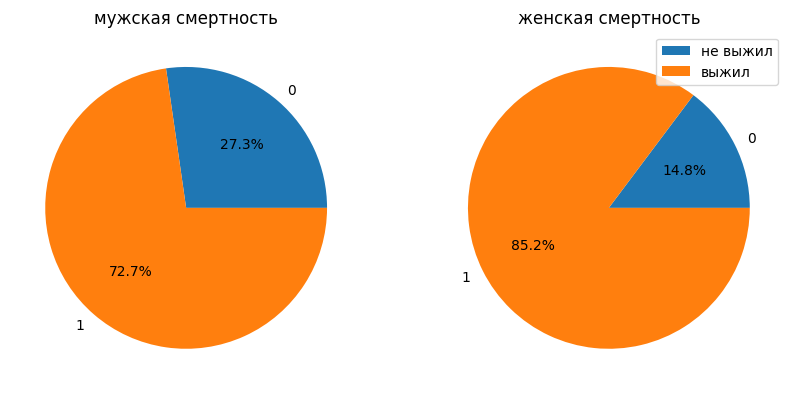

In [256]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data1 = data.loc[(data['male'] == 1), 'isAlive'].value_counts().sort_index()
data2 = data.loc[(data['male'] == 0), 'isAlive'].value_counts().sort_index()

ax1.pie(data1.values, labels=data1.index, autopct="%1.1f%%")
ax2.pie(data2.values, labels=data2.index, autopct="%1.1f%%")

ax1.set_title("мужская смертность")
ax2.set_title("женская смертность")

plt.legend(['не выжил', 'выжил'])
plt.show()

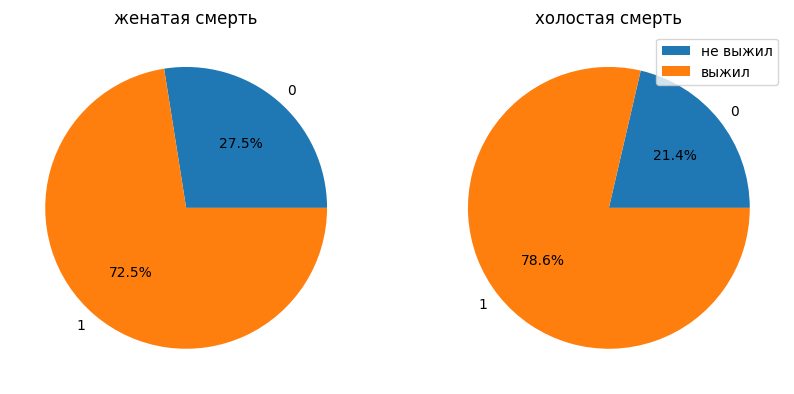

In [257]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data1 = data.loc[(data['isMarried'] == 1), 'isAlive'].value_counts().sort_index()
data2 = data.loc[(data['isMarried'] == 0), 'isAlive'].value_counts().sort_index()

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("женатая смерть")
ax2.set_title('холостая смерть')

plt.legend(['не выжил', 'выжил'])
plt.show()

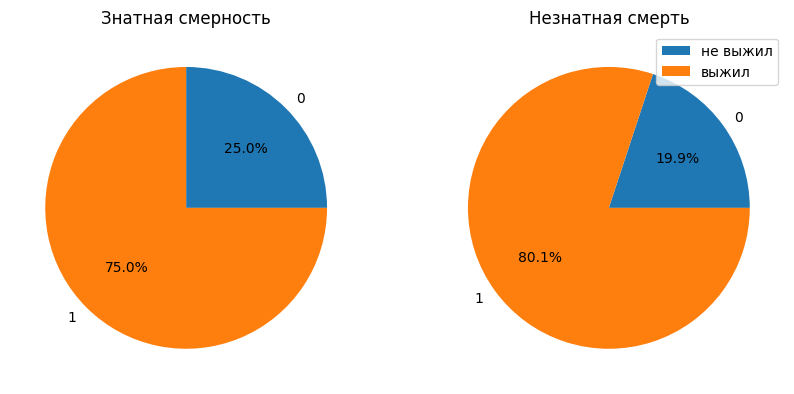

In [258]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data1 = data.loc[(data['isNoble'] == 1), 'isAlive'].value_counts().sort_index()
data2 = data.loc[(data['isNoble'] == 0), 'isAlive'].value_counts().sort_index()

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title('Знатная смерность')
ax2.set_title('Незнатная смерть')

plt.legend(["не выжил", 'выжил'])
plt.show()

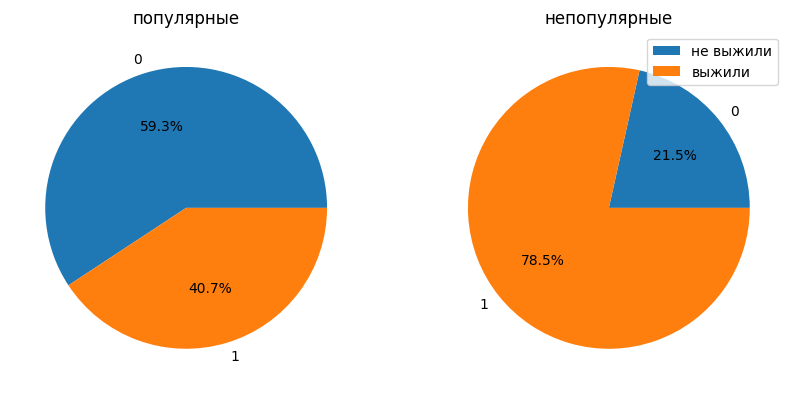

In [259]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data1 = data.loc[(data['isPopular'] == 1), 'isAlive'].value_counts().sort_index()
data2 = data.loc[(data['isPopular'] == 0), 'isAlive'].value_counts().sort_index()

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title('популярные')
ax2.set_title('непопулярные')

plt.legend(['не выжили', 'выжили'])
plt.show()

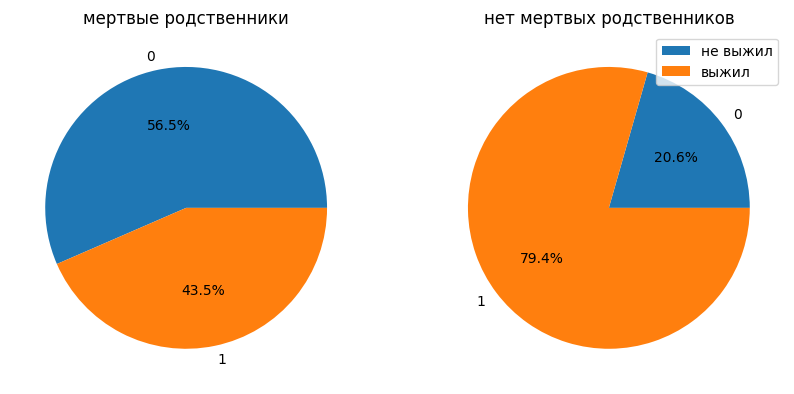

In [260]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data1 = data.loc[(data['boolDeadRelations'] == 1), 'isAlive'].value_counts().sort_index()
data2 = data.loc[(data['boolDeadRelations'] == 0), 'isAlive'].value_counts().sort_index()

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("мертвые родственники")
ax2.set_title('нет мертвых родственников')

plt.legend(['не выжил', 'выжил'])
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [261]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_data)
test_data = scaler.transform(test_data)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [265]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [266]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [267]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [268]:
# Шаг 1. создание модели
ada_boost_classifier = AdaBoostClassifier()
random_forest_classifier = RandomForestClassifier()
gaussian_process_classifier = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
kneighbors_classifier = KNeighborsClassifier()
svc = SVC()
decision_tree_classififier = DecisionTreeClassifier()

# Шаг 2. обучение модели
ada_boost_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
gaussian_process_classifier.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
kneighbors_classifier.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree_classififier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost_classifier.predict(X_test)
y_pred = random_forest_classifier.predict(X_test)
y_pred = gaussian_process_classifier.predict(X_test)
y_pred = gaussian_nb.predict(X_test)
y_pred = kneighbors_classifier.predict(X_test)
y_pred = svc.predict(X_test)
y_pred = decision_tree_classififier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [269]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [270]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [271]:
# Шаг 3. Предсказание на тестовых данных
# Шаг 4. Оценка предсказания по метрике accuracy
y_pred = ada_boost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

y_pred = gaussian_process_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

y_pred = gaussian_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

y_pred = kneighbors_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

y_pred = decision_tree_classififier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949
Accuracy : 0.7981
Accuracy : 0.7724
Accuracy : 0.3462
Accuracy : 0.7821
Accuracy : 0.7788
Accuracy : 0.7885


Выберите лучшую модель: random_forest_classifier

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [272]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.1MB/s]


In [273]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [207]:
new_mas =

Index([], dtype='object')

In [274]:
y_pred = random_forest_classifier.predict(test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 406 features, but RandomForestClassifier is expecting 405 features as input.

In [141]:
submission['isAlive'] = y_pred

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)